# Google Analytics Customer Revenue Prediction

## 1. Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pandas.io.json import json_normalize
%matplotlib inline

## 2. Data Loading 

In [2]:
def load_df(csv_path='../data/train.csv', nrows=None):
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
    df = pd.read_csv(csv_path,
                     parse_dates=['date'],
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'}, # Important!!
                     nrows=nrows)
    
    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
    return df

In [6]:
%%time
train = load_df()
test = load_df('../data/test.csv')

CPU times: user 3min 55s, sys: 12.3 s, total: 4min 7s
Wall time: 4min 5s


## 3. Feature Exploration

### Data Fields
* fullVisitorId- A unique identifier for each user of the Google Merchandise Store.
* channelGrouping - The channel via which the user came to the Store.
* date - The date on which the user visited the Store.
* device - The specifications for the device used to access the Store.
* geoNetwork - This section contains information about the geography of the user.
* sessionId - A unique identifier for this visit to the store.
* socialEngagementType - Engagement type, either "Socially Engaged" or "Not Socially Engaged".
* totals - This section contains aggregate values across the session.
* trafficSource - This section contains information about the Traffic Source from which the session originated.
* visitId - An identifier for this session. This is part of the value usually stored as the _utmb cookie. This is only unique to the user. For a completely unique ID, you *  should use a combination of fullVisitorId and visitId.
* visitNumber - The session number for this user. If this is the first session, then this is set to 1.
* visitStartTime - The timestamp (expressed as POSIX time).

In [7]:
train.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,...,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,2016-09-02,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
1,Organic Search,2016-09-02,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
2,Organic Search,2016-09-02,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
3,Organic Search,2016-09-02,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,google + online,organic,NaN,google
4,Organic Search,2016-09-02,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,True,(not provided),organic,NaN,google


In [8]:
test.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,...,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,2017-10-16,6167871330617112363,6167871330617112363_1508151024,Not Socially Engaged,1508151024,2,1508151024,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),True,(not provided),organic,NaN,google
1,Organic Search,2017-10-16,0643697640977915618,0643697640977915618_1508175522,Not Socially Engaged,1508175522,1,1508175522,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
2,Organic Search,2017-10-16,6059383810968229466,6059383810968229466_1508143220,Not Socially Engaged,1508143220,1,1508143220,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
3,Organic Search,2017-10-16,2376720078563423631,2376720078563423631_1508193530,Not Socially Engaged,1508193530,1,1508193530,Safari,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
4,Organic Search,2017-10-16,2314544520795440038,2314544520795440038_1508217442,Not Socially Engaged,1508217442,1,1508217442,Safari,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google


### 3-1 Missing Column
* what is a missing column of test data?

In [9]:
train_col = train.columns
test_col = test.columns

In [10]:
train_col.isin(test_col)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True])

In [11]:
train_col[-16], train_col[-6], 

('totals.transactionRevenue', 'trafficSource.campaignCode')

In [12]:
#drop the missing column of train data
train=train.drop('trafficSource.campaignCode', axis=1)

In [13]:
train.shape, test.shape

((903653, 54), (804684, 53))

### 3-2 Feature Engineering
* drop useless features
* classifing dtypes of features

In [27]:
Number=['visitNumber','totals.bounces','totals.hits','totals.newVisits','totals.pageviews','totals.transactionRevenue']
useless=['sessionId','socialEngagementType','device.browser','device.browserSize','device.browserVersion','device.flashVersion','device.language',
         'device.mobileDeviceBranding', 'device.mobileDeviceInfo','device.mobileDeviceMarketingName','device.mobileDeviceModel','device.mobileInputSelector',
         'device.operatingSystemVersion','device.screenColors','device.screenResolution','geoNetwork.cityId','geoNetwork.latitude','geoNetwork.longitude',
         'geoNetwork.networkDomain','geoNetwork.networkLocation','trafficSource.adContent','trafficSource.adwordsClickInfo.criteriaParameters',
         'trafficSource.adwordsClickInfo.gclId','trafficSource.adwordsClickInfo.isVideoAd','trafficSource.adwordsClickInfo.page','trafficSource.adwordsClickInfo.slot',
         'trafficSource.referralPath','trafficSource.source']        
ID=['fullVisitorId']
date=['date']
timestamp=['visitStartTime']
ambiguous=['sessionId','visitId','device.operatingSystem','totals.visits']
blooen=['device.isMobile']

In [18]:
train = train.drop(useless, axis=1)
test =test.drop(useless, axis=1)

In [19]:
train.shape[1], test.shape[1]

(26, 25)

In [20]:
train.to_csv("../data/train_0929.csv", index=False)
test.to_csv("../data/test_0929.csv", index=False)

In [9]:
train=pd.read_csv('../data/train_0929.csv')
test=pd.read_csv('../data/test_0929.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### 3-3 Feature Preprocessing
* Datetime
* Missing Values
* EDA
* feature encoding

### 3-3-1 DateTime

In [10]:
train.head()

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,device.deviceCategory,device.isMobile,device.operatingSystem,geoNetwork.city,...,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,totals.visits,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium
0,Organic Search,2016-09-02,1131660440785968503,1472830385,1,1472830385,desktop,False,Windows,Izmir,...,1,1.0,1.0,NaN,1,NaN,(not set),NaN,(not provided),organic
1,Organic Search,2016-09-02,377306020877927890,1472880147,1,1472880147,desktop,False,Macintosh,not available in demo dataset,...,1,1.0,1.0,NaN,1,NaN,(not set),NaN,(not provided),organic
2,Organic Search,2016-09-02,3895546263509774583,1472865386,1,1472865386,desktop,False,Windows,Madrid,...,1,1.0,1.0,NaN,1,NaN,(not set),NaN,(not provided),organic
3,Organic Search,2016-09-02,4763447161404445595,1472881213,1,1472881213,desktop,False,Linux,not available in demo dataset,...,1,1.0,1.0,NaN,1,NaN,(not set),NaN,google + online,organic
4,Organic Search,2016-09-02,27294437909732085,1472822600,2,1472822600,mobile,True,Android,not available in demo dataset,...,1,NaN,1.0,NaN,1,NaN,(not set),True,(not provided),organic


In [11]:
test.head()

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,device.deviceCategory,device.isMobile,device.operatingSystem,geoNetwork.city,...,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.visits,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium
0,Organic Search,2017-10-16,6167871330617112363,1508151024,2,1508151024,desktop,False,Macintosh,(not set),...,NaN,4,NaN,4.0,1,NaN,(not set),True,(not provided),organic
1,Organic Search,2017-10-16,0643697640977915618,1508175522,1,1508175522,desktop,False,Windows,Zaragoza,...,NaN,5,1.0,5.0,1,NaN,(not set),NaN,(not provided),organic
2,Organic Search,2017-10-16,6059383810968229466,1508143220,1,1508143220,desktop,False,Macintosh,not available in demo dataset,...,NaN,7,1.0,7.0,1,NaN,(not set),NaN,(not provided),organic
3,Organic Search,2017-10-16,2376720078563423631,1508193530,1,1508193530,mobile,True,iOS,Mountain View,...,NaN,8,1.0,4.0,1,NaN,(not set),NaN,(not provided),organic
4,Organic Search,2017-10-16,2314544520795440038,1508217442,1,1508217442,desktop,False,Macintosh,San Jose,...,NaN,9,1.0,4.0,1,NaN,(not set),NaN,(not provided),organic


In [12]:
train['visitStartTime']=pd.to_datetime(train['visitStartTime'], unit='s')
test['visitStartTime']=pd.to_datetime(test['visitStartTime'], unit='s')

* [how to convert Timestamp to Datetime?](https://www.laurivan.com/convert-timestamp-to-datetime-for-pandas-dataframe/)

In [13]:
train.head()

,channelGrouping,date,fullVisitorId,visitId,visitNumber,visitStartTime,device.deviceCategory,device.isMobile,device.operatingSystem,geoNetwork.city,...,totals.hits,totals.newVisits,totals.pageviews,totals.transactionRevenue,totals.visits,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium
0,Organic Search,2016-09-02,1131660440785968503,1472830385,1,2016-09-02 15:33:05,desktop,False,Windows,Izmir,...,1,1.0,1.0,NaN,1,NaN,(not set),NaN,(not provided),organic
1,Organic Search,2016-09-02,377306020877927890,1472880147,1,2016-09-03 05:22:27,desktop,False,Macintosh,not available in demo dataset,...,1,1.0,1.0,NaN,1,NaN,(not set),NaN,(not provided),organic
2,Organic Search,2016-09-02,3895546263509774583,1472865386,1,2016-09-03 01:16:26,desktop,False,Windows,Madrid,...,1,1.0,1.0,NaN,1,NaN,(not set),NaN,(not provided),organic
3,Organic Search,2016-09-02,4763447161404445595,1472881213,1,2016-09-03 05:40:13,desktop,False,Linux,not available in demo dataset,...,1,1.0,1.0,NaN,1,NaN,(not set),NaN,google + online,organic
4,Organic Search,2016-09-02,27294437909732085,1472822600,2,2016-09-02 13:23:20,mobile,True,Android,not available in demo dataset,...,1,NaN,1.0,NaN,1,NaN,(not set),True,(not provided),organic


In [14]:
train['year']=train['visitStartTime'].dt.year
train['month']=train['visitStartTime'].dt.month
train['day']=train['visitStartTime'].dt.day
train['week']=train['visitStartTime'].dt.dayofweek
train['hour']=train['visitStartTime'].dt.hour

In [15]:
test['year']=test['visitStartTime'].dt.year
test['month']=test['visitStartTime'].dt.month
test['day']=test['visitStartTime'].dt.day
test['week']=test['visitStartTime'].dt.dayofweek
test['hour']=test['visitStartTime'].dt.hour

In [16]:
train=train.drop(['date', 'visitStartTime'], axis=1)

test=test.drop(['date', 'visitStartTime'], axis=1)

In [17]:
train.head()

,channelGrouping,fullVisitorId,visitId,visitNumber,device.deviceCategory,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,...,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,year,month,day,week,hour
0,Organic Search,1131660440785968503,1472830385,1,desktop,False,Windows,Izmir,Asia,Turkey,...,NaN,(not set),NaN,(not provided),organic,2016,9,2,4,15
1,Organic Search,377306020877927890,1472880147,1,desktop,False,Macintosh,not available in demo dataset,Oceania,Australia,...,NaN,(not set),NaN,(not provided),organic,2016,9,3,5,5
2,Organic Search,3895546263509774583,1472865386,1,desktop,False,Windows,Madrid,Europe,Spain,...,NaN,(not set),NaN,(not provided),organic,2016,9,3,5,1
3,Organic Search,4763447161404445595,1472881213,1,desktop,False,Linux,not available in demo dataset,Asia,Indonesia,...,NaN,(not set),NaN,google + online,organic,2016,9,3,5,5
4,Organic Search,27294437909732085,1472822600,2,mobile,True,Android,not available in demo dataset,Europe,United Kingdom,...,NaN,(not set),True,(not provided),organic,2016,9,2,4,13


In [18]:
test.head()

,channelGrouping,fullVisitorId,visitId,visitNumber,device.deviceCategory,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,...,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,year,month,day,week,hour
0,Organic Search,6167871330617112363,1508151024,2,desktop,False,Macintosh,(not set),Asia,Singapore,...,NaN,(not set),True,(not provided),organic,2017,10,16,0,10
1,Organic Search,0643697640977915618,1508175522,1,desktop,False,Windows,Zaragoza,Europe,Spain,...,NaN,(not set),NaN,(not provided),organic,2017,10,16,0,17
2,Organic Search,6059383810968229466,1508143220,1,desktop,False,Macintosh,not available in demo dataset,Europe,France,...,NaN,(not set),NaN,(not provided),organic,2017,10,16,0,8
3,Organic Search,2376720078563423631,1508193530,1,mobile,True,iOS,Mountain View,Americas,United States,...,NaN,(not set),NaN,(not provided),organic,2017,10,16,0,22
4,Organic Search,2314544520795440038,1508217442,1,desktop,False,Macintosh,San Jose,Americas,United States,...,NaN,(not set),NaN,(not provided),organic,2017,10,17,1,5


### 3-3-2 Missing Values

In [19]:
train.isnull().sum()/train.shape[0]

channelGrouping                                 0.000000
fullVisitorId                                   0.000000
visitId                                         0.000000
visitNumber                                     0.000000
device.deviceCategory                           0.000000
device.isMobile                                 0.000000
device.operatingSystem                          0.000000
geoNetwork.city                                 0.000000
geoNetwork.continent                            0.000000
geoNetwork.country                              0.000000
geoNetwork.metro                                0.000000
geoNetwork.region                               0.000000
geoNetwork.subContinent                         0.000000
totals.bounces                                  0.501324
totals.hits                                     0.000000
totals.newVisits                                0.221980
totals.pageviews                                0.000111
totals.transactionRevenue      

In [20]:
test.isnull().sum()/test.shape[0]

channelGrouping                                 0.000000
fullVisitorId                                   0.000000
visitId                                         0.000000
visitNumber                                     0.000000
device.deviceCategory                           0.000000
device.isMobile                                 0.000000
device.operatingSystem                          0.000000
geoNetwork.city                                 0.000000
geoNetwork.continent                            0.000000
geoNetwork.country                              0.000000
geoNetwork.metro                                0.000000
geoNetwork.region                               0.000000
geoNetwork.subContinent                         0.000000
totals.bounces                                  0.476878
totals.hits                                     0.000000
totals.newVisits                                0.248935
totals.pageviews                                0.000173
totals.visits                  

In [21]:
train['totals.bounces']=train['totals.bounces'].fillna(0) #bounce or not 
test['totals.bounces']=test['totals.bounces'].fillna(0)

In [22]:
train['totals.newVisits']=train['totals.newVisits'].fillna(0) #bounce or not 
test['totals.newVisits']=test['totals.newVisits'].fillna(0)

In [23]:
train['totals.transactionRevenue']=train['totals.transactionRevenue'].fillna(0) #NaN is non profitable session

In [24]:
train['totals.pageviews']=train['totals.pageviews'].fillna(0) #NaN is bounce?
test['totals.pageviews']=test['totals.pageviews'].fillna(0)

In [25]:
train = train.drop('trafficSource.adwordsClickInfo.adNetworkType', axis=1)
test=test.drop('trafficSource.adwordsClickInfo.adNetworkType', axis=1)

In [26]:
train['trafficSource.isTrueDirect']=train['trafficSource.isTrueDirect'].astype(float).fillna(0) #direct or not
test['trafficSource.isTrueDirect']=test['trafficSource.isTrueDirect'].astype(float).fillna(0)

In [27]:
train['trafficSource.keyword']=train['trafficSource.keyword'].notnull().astype(float) #\ with keyword = 1, without keyword =0 
test['trafficSource.keyword']=test['trafficSource.keyword'].notnull().astype(float)

In [28]:
train.isnull().sum()/train.shape[0]

channelGrouping               0.0
fullVisitorId                 0.0
visitId                       0.0
visitNumber                   0.0
device.deviceCategory         0.0
device.isMobile               0.0
device.operatingSystem        0.0
geoNetwork.city               0.0
geoNetwork.continent          0.0
geoNetwork.country            0.0
geoNetwork.metro              0.0
geoNetwork.region             0.0
geoNetwork.subContinent       0.0
totals.bounces                0.0
totals.hits                   0.0
totals.newVisits              0.0
totals.pageviews              0.0
totals.transactionRevenue     0.0
totals.visits                 0.0
trafficSource.campaign        0.0
trafficSource.isTrueDirect    0.0
trafficSource.keyword         0.0
trafficSource.medium          0.0
year                          0.0
month                         0.0
day                           0.0
week                          0.0
hour                          0.0
dtype: float64

In [29]:
test.isnull().sum()/test.shape[0]

channelGrouping               0.0
fullVisitorId                 0.0
visitId                       0.0
visitNumber                   0.0
device.deviceCategory         0.0
device.isMobile               0.0
device.operatingSystem        0.0
geoNetwork.city               0.0
geoNetwork.continent          0.0
geoNetwork.country            0.0
geoNetwork.metro              0.0
geoNetwork.region             0.0
geoNetwork.subContinent       0.0
totals.bounces                0.0
totals.hits                   0.0
totals.newVisits              0.0
totals.pageviews              0.0
totals.visits                 0.0
trafficSource.campaign        0.0
trafficSource.isTrueDirect    0.0
trafficSource.keyword         0.0
trafficSource.medium          0.0
year                          0.0
month                         0.0
day                           0.0
week                          0.0
hour                          0.0
dtype: float64

In [30]:
train.to_csv("../data/train_1001.csv", index=False)
test.to_csv("../data/test_1001.csv", index=False)

### 3-3-3 EDA


In [2]:
train = pd.read_csv('../data/train_1001.csv')
test = pd.read_csv('../data/test_1001.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train.head()

,channelGrouping,fullVisitorId,visitId,visitNumber,device.deviceCategory,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,...,totals.visits,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,year,month,day,week,hour
0,Organic Search,1131660440785968503,1472830385,1,desktop,False,Windows,Izmir,Asia,Turkey,...,1,(not set),0.0,1.0,organic,2016,9,2,4,15
1,Organic Search,377306020877927890,1472880147,1,desktop,False,Macintosh,not available in demo dataset,Oceania,Australia,...,1,(not set),0.0,1.0,organic,2016,9,3,5,5
2,Organic Search,3895546263509774583,1472865386,1,desktop,False,Windows,Madrid,Europe,Spain,...,1,(not set),0.0,1.0,organic,2016,9,3,5,1
3,Organic Search,4763447161404445595,1472881213,1,desktop,False,Linux,not available in demo dataset,Asia,Indonesia,...,1,(not set),0.0,1.0,organic,2016,9,3,5,5
4,Organic Search,27294437909732085,1472822600,2,mobile,True,Android,not available in demo dataset,Europe,United Kingdom,...,1,(not set),1.0,1.0,organic,2016,9,2,4,13


In [4]:
test.head()

,channelGrouping,fullVisitorId,visitId,visitNumber,device.deviceCategory,device.isMobile,device.operatingSystem,geoNetwork.city,geoNetwork.continent,geoNetwork.country,...,totals.visits,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,year,month,day,week,hour
0,Organic Search,6167871330617112363,1508151024,2,desktop,False,Macintosh,(not set),Asia,Singapore,...,1,(not set),1.0,1.0,organic,2017,10,16,0,10
1,Organic Search,0643697640977915618,1508175522,1,desktop,False,Windows,Zaragoza,Europe,Spain,...,1,(not set),0.0,1.0,organic,2017,10,16,0,17
2,Organic Search,6059383810968229466,1508143220,1,desktop,False,Macintosh,not available in demo dataset,Europe,France,...,1,(not set),0.0,1.0,organic,2017,10,16,0,8
3,Organic Search,2376720078563423631,1508193530,1,mobile,True,iOS,Mountain View,Americas,United States,...,1,(not set),0.0,1.0,organic,2017,10,16,0,22
4,Organic Search,2314544520795440038,1508217442,1,desktop,False,Macintosh,San Jose,Americas,United States,...,1,(not set),0.0,1.0,organic,2017,10,17,1,5


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 28 columns):
channelGrouping               903653 non-null object
fullVisitorId                 903653 non-null object
visitId                       903653 non-null int64
visitNumber                   903653 non-null int64
device.deviceCategory         903653 non-null object
device.isMobile               903653 non-null bool
device.operatingSystem        903653 non-null object
geoNetwork.city               903653 non-null object
geoNetwork.continent          903653 non-null object
geoNetwork.country            903653 non-null object
geoNetwork.metro              903653 non-null object
geoNetwork.region             903653 non-null object
geoNetwork.subContinent       903653 non-null object
totals.bounces                903653 non-null float64
totals.hits                   903653 non-null int64
totals.newVisits              903653 non-null float64
totals.pageviews              903653 non-nul

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804684 entries, 0 to 804683
Data columns (total 27 columns):
channelGrouping               804684 non-null object
fullVisitorId                 804684 non-null object
visitId                       804684 non-null int64
visitNumber                   804684 non-null int64
device.deviceCategory         804684 non-null object
device.isMobile               804684 non-null bool
device.operatingSystem        804684 non-null object
geoNetwork.city               804684 non-null object
geoNetwork.continent          804684 non-null object
geoNetwork.country            804684 non-null object
geoNetwork.metro              804684 non-null object
geoNetwork.region             804684 non-null object
geoNetwork.subContinent       804684 non-null object
totals.bounces                804684 non-null float64
totals.hits                   804684 non-null int64
totals.newVisits              804684 non-null float64
totals.pageviews              804684 non-nul

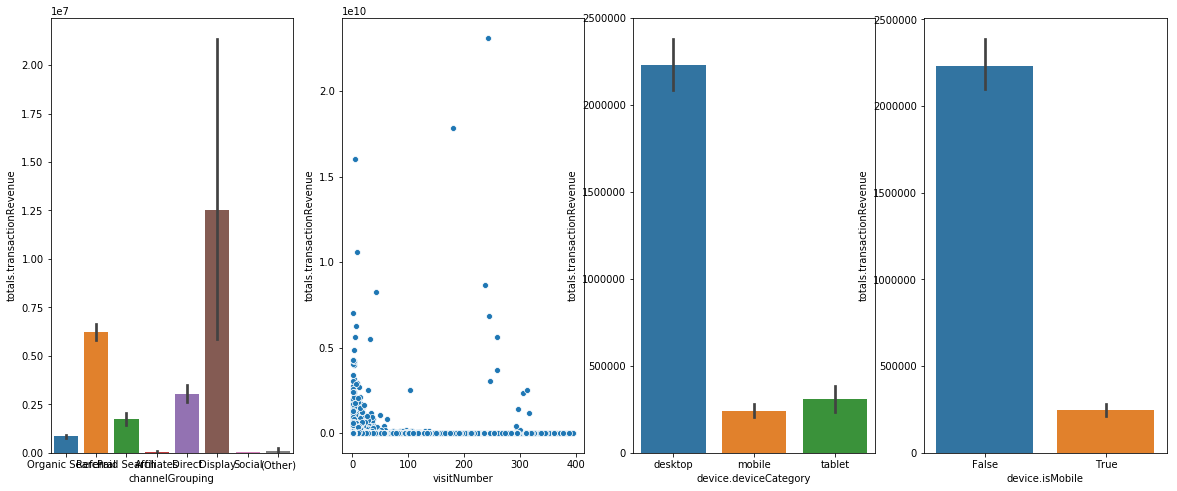

In [11]:
fig, (ax1, ax2, ax3, ax4)= plt.subplots(nrows=1, ncols=4)
fig.set_size_inches(20,8)
      
sns.barplot(data=train, x = 'channelGrouping', y = 'totals.transactionRevenue', ax=ax1)
sns.scatterplot(data=train, x = 'visitNumber', y = 'totals.transactionRevenue', ax=ax2)
sns.barplot(data=train, x = 'device.deviceCategory', y = 'totals.transactionRevenue', ax=ax3)
sns.barplot(data=train, x = 'device.isMobile', y = 'totals.transactionRevenue', ax=ax4)

In [16]:
print(train['device.operatingSystem'].unique(), train['device.operatingSystem'].nunique())
print(test['device.operatingSystem'].unique(), test['device.operatingSystem'].nunique())

['Windows' 'Macintosh' 'Linux' 'Android' 'iOS' 'Chrome OS' 'BlackBerry'
 '(not set)' 'Samsung' 'Windows Phone' 'Xbox' 'Nintendo Wii' 'Firefox OS'
 'Nintendo WiiU' 'FreeBSD' 'Nokia' 'NTT DoCoMo' 'Nintendo 3DS' 'SunOS'
 'OpenBSD'] 20
['Macintosh' 'Windows' 'iOS' 'Linux' 'Android' 'Chrome OS' '(not set)'
 'Windows Phone' 'Samsung' 'Tizen' 'Playstation Vita' 'OS/2' 'Xbox'
 'Nintendo 3DS' 'BlackBerry' 'Nintendo WiiU' 'SymbianOS' 'Firefox OS'
 'FreeBSD' 'OpenBSD' 'SunOS' 'Nokia'] 22


In [17]:
# drop a useless column
train= train.drop('device.operatingSystem', axis=1)
test= test.drop('device.operatingSystem', axis=1)

In [25]:
train[['geoNetwork.city','geoNetwork.continent','geoNetwork.country','geoNetwork.metro','geoNetwork.region','geoNetwork.subContinent']].value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [26]:
print(train['geoNetwork.city'].unique(), train['geoNetwork.city'].nunique())
print(test['geoNetwork.city'].unique(), test['geoNetwork.city'].nunique())

['Izmir' 'not available in demo dataset' 'Madrid' 'Brisbane' 'Karachi'
 'Paris' 'Singapore' 'Buenos Aires' '(not set)' 'Bangkok' 'Jakarta'
 'Bengaluru' 'London' 'Amsterdam' 'Moscow' 'Kolkata' 'Seoul' 'Santiago'
 'Warsaw' 'Dublin' 'Mexico City' 'Barcelona' 'Sao Paulo' 'Mountain View'
 'Istanbul' 'Dubai' 'New Delhi' 'Sydney' 'New York' 'Rio de Janeiro'
 'Hyderabad' 'Toronto' 'Washington' 'Los Angeles' 'Pune' 'San Francisco'
 'Seattle' 'Palo Alto' 'Santa Clara' 'Mumbai' 'Colombo' 'Rome' 'Chicago'
 'Nairobi' 'Boston' 'Tel Aviv-Yafo' 'La Victoria' 'Sunnyvale' 'Ann Arbor'
 'San Jose' 'Austin' 'Pittsburgh' 'Montreal' 'Cupertino' 'Salem'
 'Ho Chi Minh City' 'Hanoi' 'Tunis' 'Monterrey' 'Ankara' 'Quezon City'
 'Budapest' 'Minato' 'Dallas' 'Vancouver' 'Kirkland' 'Yokohama'
 'Stockholm' 'Tigard' 'Fremont' 'Boulder' 'Munich' 'Chennai' 'Kiev'
 'Houston' 'Hong Kong' 'Prague' 'Frankfurt' 'Atlanta' 'Ostrava' 'Portland'
 'Hamburg' 'Decin' 'Hradec Kralove' 'Lisbon' 'San Diego' 'Cambridge'
 'Beijing' 'Mel

In [27]:
print(train['geoNetwork.continent'].unique(), train['geoNetwork.continent'].nunique())
print(test['geoNetwork.continent'].unique(), test['geoNetwork.continent'].nunique())

['Asia' 'Oceania' 'Europe' 'Americas' 'Africa' '(not set)'] 6
['Asia' 'Europe' 'Americas' 'Africa' 'Oceania' '(not set)'] 6


In [28]:
print(train['geoNetwork.country'].unique(), train['geoNetwork.country'].nunique())
print(test['geoNetwork.country'].unique(), test['geoNetwork.country'].nunique())

['Turkey' 'Australia' 'Spain' 'Indonesia' 'United Kingdom' 'Italy'
 'Pakistan' 'Austria' 'Netherlands' 'India' 'France' 'Brazil' 'China'
 'Singapore' 'Argentina' 'Poland' 'Germany' 'Canada' 'Thailand' 'Hungary'
 'Malaysia' 'Denmark' 'Taiwan' 'Russia' 'Nigeria' 'Belgium' 'South Korea'
 'Chile' 'Ireland' 'Philippines' 'Greece' 'Mexico' 'Montenegro'
 'United States' 'Bangladesh' 'Japan' 'Slovenia' 'Czechia' 'Sweden'
 'United Arab Emirates' 'Switzerland' 'Portugal' 'Peru' 'Hong Kong'
 'Vietnam' 'Sri Lanka' 'Serbia' 'Norway' 'Romania' 'Kenya' 'Ukraine'
 'Israel' 'Slovakia' '(not set)' 'Lithuania' 'Puerto Rico'
 'Bosnia & Herzegovina' 'Croatia' 'South Africa' 'Paraguay' 'Botswana'
 'Colombia' 'Uruguay' 'Algeria' 'Finland' 'Guatemala' 'Egypt' 'Malta'
 'Bulgaria' 'New Zealand' 'Kuwait' 'Uzbekistan' 'Saudi Arabia' 'Cyprus'
 'Estonia' 'Côte d’Ivoire' 'Morocco' 'Tunisia' 'Venezuela'
 'Dominican Republic' 'Senegal' 'Cape Verde' 'Costa Rica' 'Kazakhstan'
 'Macedonia (FYROM)' 'Oman' 'Laos' 'Ethiopia

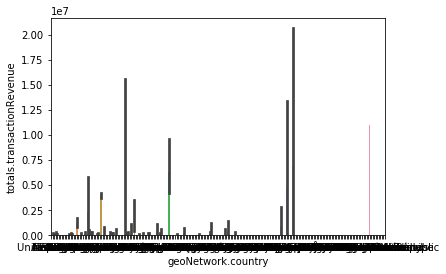

In [29]:
sns.barplot(data=train, x = 'geoNetwork.country', y = 'totals.transactionRevenue')

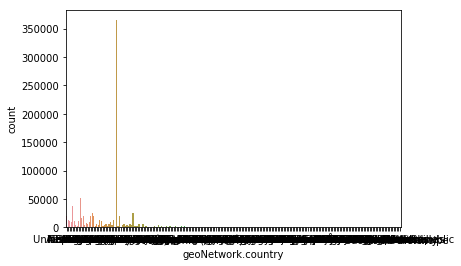

In [30]:
sns.countplot(data=train, x = 'geoNetwork.country')

In [42]:
train.groupby('geoNetwork.country')['totals.transactionRevenue'].sum().sort_values(ascending=False).head(10)

geoNetwork.country
United States     1.452441e+12
Canada            3.282454e+10
Venezuela         1.337490e+10
Japan             6.728990e+09
Kenya             5.268700e+09
Nigeria           3.302400e+09
Taiwan            1.920890e+09
Indonesia         1.840380e+09
Australia         1.745260e+09
United Kingdom    1.689450e+09
Name: totals.transactionRevenue, dtype: float64